In [82]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear

In [84]:
# os.chdir('folktables-experiments/multidecomp/')
!pwd

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


In [49]:
import numpy as np
import pandas as pd

In [50]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 100.0, 
        'label_noise_width':100, 'drop_sensitive':False
        }
syn_ob = SynthGenLinear(**params)

In [51]:
syn_ob.df[['active_labels', 'bin_masked_labels']]
df = syn_ob.df

In [52]:
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [53]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'active_labels', 'bin_masked_labels'],
      dtype='object')

In [54]:
df['active_labels']

0         [405.91542942404817, 528.5899350890788]
1        [395.16141899688756, 475.93176269090446]
2         [393.52819283609836, 520.4921027181767]
3          [447.2608227388385, 590.4115777336178]
4        [407.94560132913045, 434.77598917985864]
                           ...                   
99995     [326.25847823350216, 538.6771592759383]
99996       [343.53276722892144, 517.17891139323]
99997      [372.1484891315317, 534.6182452201348]
99998     [338.6971808408697, 479.89532287459326]
99999      [434.1459971550883, 580.4158689053901]
Name: active_labels, Length: 100000, dtype: object

In [55]:
df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)


In [56]:
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,active_labels,bin_masked_labels,y_min_active,y_max_active,y_mean_active
0,0.279491,0.401812,0.036895,0.131343,0.467428,0.364121,0.450258,0.228082,0.674197,0.001450,...,518.329267,466.701510,510.982084,528.589935,498.772831,"[405.91542942404817, 528.5899350890788]","[0.0, 405.91542942404817, 0.0, 0.0, 0.0, 0.0, ...",405.915429,528.589935,467.252682
1,0.513748,0.135303,0.218826,0.549157,0.025287,0.451381,0.070759,0.293933,0.999309,0.406511,...,417.775046,441.835525,461.839770,442.304987,328.450089,"[395.16141899688756, 475.93176269090446]","[0.0, 395.16141899688756, 475.93176269090446, ...",395.161419,475.931763,435.546591
2,0.166579,0.340924,0.007128,0.973089,0.009111,0.444819,0.249515,0.230208,0.244677,0.947264,...,543.198933,387.535996,520.492103,477.813588,429.931113,"[393.52819283609836, 520.4921027181767]","[393.52819283609836, 0.0, 0.0, 0.0, 0.0, 520.4...",393.528193,520.492103,457.010148
3,0.580109,0.230714,0.917506,0.550996,0.486652,0.146035,0.696485,0.788381,0.396081,0.332110,...,630.100215,478.560028,612.859483,582.147853,541.478819,"[447.2608227388385, 590.4115777336178]","[447.2608227388385, 0.0, 590.4115777336178, 0....",447.260823,590.411578,518.836200
4,0.125677,0.303890,0.904624,0.626142,0.052856,0.229937,0.401565,0.479346,0.053368,0.263272,...,486.408688,434.775989,501.512412,470.511543,456.872926,"[407.94560132913045, 434.77598917985864]","[407.94560132913045, 0.0, 0.0, 0.0, 434.775989...",407.945601,434.775989,421.360795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.848717,0.929594,0.329590,0.135028,0.488475,0.628540,0.812572,0.133230,0.365866,0.740899,...,558.051794,463.610235,509.519685,538.677159,537.341863,"[326.25847823350216, 538.6771592759383]","[326.25847823350216, 0.0, 0.0, 0.0, 0.0, 0.0, ...",326.258478,538.677159,432.467819
99996,0.214928,0.678770,0.811984,0.855298,0.223654,0.132428,0.323700,0.181999,0.653849,0.111031,...,564.994255,457.102784,575.064378,502.006315,452.940526,"[343.53276722892144, 517.17891139323]","[343.53276722892144, 0.0, 517.17891139323, 0.0...",343.532767,517.178911,430.355839
99997,0.203443,0.970124,0.565372,0.612191,0.366542,0.159745,0.095502,0.435033,0.869483,0.465668,...,596.784000,428.718664,566.991425,498.712938,425.247707,"[372.1484891315317, 534.6182452201348]","[372.1484891315317, 0.0, 534.6182452201348, 0....",372.148489,534.618245,453.383367
99998,0.691444,0.548197,0.740326,0.317578,0.778052,0.170811,0.063849,0.539695,0.938723,0.120229,...,572.148348,466.145646,555.400587,579.324153,479.895323,"[338.6971808408697, 479.89532287459326]","[338.6971808408697, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",338.697181,479.895323,409.296252


# Even though labels for each group are realizable by linear, their combination is not linear!
Single linear learner unable to capture this, and as expected cannot get a perfect r2

In [57]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7795469130586292 0.776488640514074


In [58]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7625287169106985 0.768133686243502


In [59]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8565820910088816 0.8575479858104145


In [60]:
# for mean of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8565820910088816 0.8575479858104145


# Batch comparing models across different groups, are they similar or not
- use model trained on data for one group, test it on data of another (test its r2 score on data of other)

In [61]:
y_all = [col for col in df if col.startswith('y')]
print(y_all)
print(filter_group)
print(filter_feature)

['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_min_active', 'y_max_active', 'y_mean_active']
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19']


In [62]:
df.drop(y_all, axis=1).head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,g_male,g_female,g_white,g_black,g_two-or-more,g_some-other,g_asian,g_native-am,active_labels,bin_masked_labels
0,0.279491,0.401812,0.036895,0.131343,0.467428,0.364121,0.450258,0.228082,0.674197,0.001450,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"[405.91542942404817, 528.5899350890788]","[0.0, 405.91542942404817, 0.0, 0.0, 0.0, 0.0, ..."
1,0.513748,0.135303,0.218826,0.549157,0.025287,0.451381,0.070759,0.293933,0.999309,0.406511,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[395.16141899688756, 475.93176269090446]","[0.0, 395.16141899688756, 475.93176269090446, ..."
2,0.166579,0.340924,0.007128,0.973089,0.009111,0.444819,0.249515,0.230208,0.244677,0.947264,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[393.52819283609836, 520.4921027181767]","[393.52819283609836, 0.0, 0.0, 0.0, 0.0, 520.4..."
3,0.580109,0.230714,0.917506,0.550996,0.486652,0.146035,0.696485,0.788381,0.396081,0.332110,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[447.2608227388385, 590.4115777336178]","[447.2608227388385, 0.0, 590.4115777336178, 0...."
4,0.125677,0.303890,0.904624,0.626142,0.052856,0.229937,0.401565,0.479346,0.053368,0.263272,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[407.94560132913045, 434.77598917985864]","[407.94560132913045, 0.0, 0.0, 0.0, 434.775989..."


In [63]:
# tranining on data for only each group
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df.drop(y_all, axis = 1), 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)

models_lr_dict = {}
group_sizes = {}

for g in filter_group:
    indices = (X_train[g] == 1)
    model_lr = LinearRegression()
    model_lr.fit(X_train[indices][filter_feature], y_train[indices])
    key = g
    group_sizes[key] = indices.sum() #sum of all the trues
    models_lr_dict[key] = model_lr

In [64]:
for g in filter_group:
    indices = (X_test[g] == 1)
    key = g
    r2_score_lr = models_lr_dict[key].score(X_test[indices][filter_feature], y_test[indices])
    print(f" {key}, test group size {group_sizes[key]}  r2 score for least squares is {r2_score_lr:.4f}")

 g_male, test group size 40129  r2 score for least squares is 0.7599
 g_female, test group size 39871  r2 score for least squares is 0.7769
 g_white, test group size 48756  r2 score for least squares is 0.9999
 g_black, test group size 9510  r2 score for least squares is 0.9999
 g_two-or-more, test group size 7994  r2 score for least squares is 0.9843
 g_some-other, test group size 6495  r2 score for least squares is 0.9991
 g_asian, test group size 4797  r2 score for least squares is 1.0000
 g_native-am, test group size 2448  r2 score for least squares is 0.9866


In [65]:
def cross_test_models(model_dict: dict):
    '''
        model_dict: maps keys to linear model, these linear models are already trained and have weights
        sex_cats: labels for the different sexes
        race_cats: labels for the different races
        This function computes the performance of one model on another models data

        With an example, model_dict['SEX_1'] has the linear model trained only of those points which have SEX == 1
        we will test its performance on all the other groups data.
    '''
    keys = list(model_dict.keys())
    l = len(keys)
    mat_2d = np.zeros((l, l))
    for i in range(l):
        model_i = model_dict[keys[i]]
        for j in range(l):
            key = keys[j]
            indices_j = (X_test[key] == 1)
            mat_2d[i, j] = model_i.score(X_test[indices_j][filter_feature], y_test[indices_j]) # how model i performs on test data meant for model j, R2 score
    return mat_2d, keys

In [66]:
import numpy as np
crossmat, keys = cross_test_models(models_lr_dict)
print(crossmat, keys)

[[ 7.59907664e-01  7.76317819e-01  9.15393817e-01  8.60924776e-01
  -9.57418995e-01  7.28471202e-01  8.36619365e-01 -4.47319091e-01]
 [ 7.59540264e-01  7.76868596e-01  9.17223330e-01  8.63729210e-01
  -9.72990376e-01  7.24801830e-01  8.38430627e-01 -4.55089085e-01]
 [ 6.86621089e-01  7.08465237e-01  9.99884821e-01  7.24890098e-01
  -1.93373443e+00  4.21373110e-01  6.49025289e-01 -1.27431700e+00]
 [ 6.42850868e-01  6.71988015e-01  7.56095716e-01  9.99865376e-01
  -1.43771054e+00  7.99186900e-01  7.49769943e-01 -8.47922468e-01]
 [-4.56845882e-01 -4.83728445e-01 -1.01133504e+00 -7.77443206e-01
   9.84273802e-01 -2.52794179e-01 -3.97139684e-01  6.56363266e-01]
 [ 5.33717386e-01  5.44475682e-01  4.73431960e-01  7.89668541e-01
  -6.85614353e-01  9.99097162e-01  6.41415552e-01 -3.78434408e-01]
 [ 6.15255513e-01  6.30871490e-01  6.64715165e-01  7.36799204e-01
  -9.01298823e-01  6.39807548e-01  9.99998990e-01 -3.36790239e-01]
 [-1.55147872e-01 -1.43967114e-01 -5.49440156e-01 -3.45548273e-01
   

<Axes: >

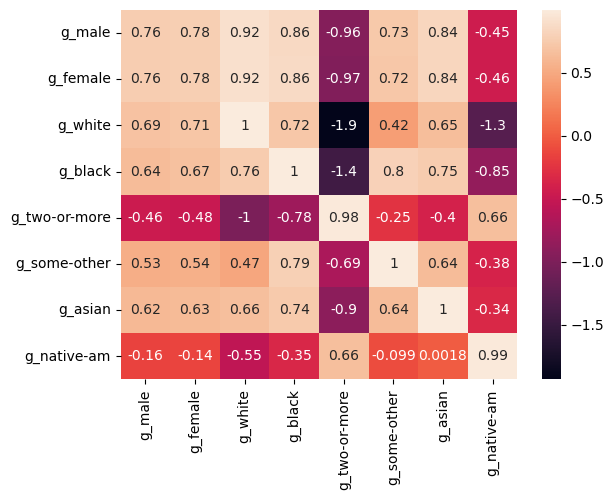

In [67]:
import seaborn as sns # for data visualization
sns.heatmap(crossmat, annot=True, xticklabels=keys, yticklabels=keys)

# Online pipeline

In [68]:
from bilevel.OnlineLinearExpert import *
from bilevel.build_all_models import *

In [69]:
# # reproducible seed for uniforms
# params = {'samples': 10000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 100.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':True
#         }
# syn_ob = SynthGenLinear(**params)
# df = syn_ob.df

In [70]:
print(df.columns)
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'active_labels', 'bin_masked_labels', 'y_min_active',
       'y_max_active', 'y_mean_active'],
      dtype='object')
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_min_active', 'y_max_active', 'y_mean_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [71]:
df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)

In [72]:
np.sum(syn_ob.A_t, axis = 0), np.sum(syn_ob.A_t, axis=1)

(array([50223., 49777., 61006., 11925.,  9898.,  8133.,  5984.,  3054.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [73]:
# need to also minmax scale? so that all in 0-1
from bilevel.utils import numeric_scaler
X_dat = df[filter_feature]
y_dat = df[['y_mean_active']]
A_t = syn_ob.A_t

X_dat = numeric_scaler(X_dat, X_dat.columns)
y_dat = numeric_scaler(y_dat, y_dat.columns)
y_dat = y_dat['y_mean_active']

In [74]:
X_dat.shape, y_dat.shape, A_t.shape

((100000, 20), (100000,), (100000, 8))

In [77]:
dirname = './synthetic_res_models/baseline'
filename = 'leastsq_0-1uniform'

In [85]:
exp_ls = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_lsbase = build_baseline_alwayson(dirname, filename, A_t, exp_ls)

100%|██████████| 100000/100000 [01:08<00:00, 1454.35it/s]


In [86]:
b_lsbase.expert.cumloss_groupwise 

[array([  0.10408257,   0.24363176,   0.27988313, ..., 103.74942497,
        103.7524976 , 103.75256316]),
 array([  0.15632112,   0.2521417 ,   0.30717307, ..., 104.70730069,
        104.70735229, 104.70850084]),
 array([ 0.09582057,  0.23536977,  0.40101484, ..., 78.23586713,
        78.23586889, 78.23593445]),
 array([ 0.07183427,  0.07796356,  0.0835158 , ..., 17.54757874,
        17.54774804, 17.54801876]),
 array([3.62513634e-02, 5.13788134e-02, 5.81985070e-02, ...,
        7.05519933e+01, 7.05541521e+01, 7.05641856e+01]),
 array([ 0.10408257,  0.1042007 ,  0.11901324, ..., 15.99305817,
        15.99373906, 15.99379066]),
 array([0.15632112, 0.27617693, 0.27772097, ..., 9.95818993, 9.95856563,
        9.9588373 ]),
 array([1.30263102e-02, 2.80148839e-02, 5.59270861e-02, ...,
        1.61572245e+01, 1.61572246e+01, 1.61602972e+01])]

In [88]:
dirname = './synthetic_res_models/Anh/'
filename = 'leastsq_x0-1,w0-100uniform'
experts_ls = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_ls)

100%|██████████| 100000/100000 [02:21<00:00, 708.52it/s]


In [94]:
# for gnum in range(A_t.shape[1]):
#     rounds_active = len(b_Anh.Anh.cuml_loss_curve[gnum])
#     rounds_active2 = len(b_lsbase.expert.cumloss_groupwise[gnum])
#     print(rounds_active, rounds_active2)

50223 50223
49777 49777
61006 61006
11925 11925
9898 9898
8133 8133
5984 5984
3054 3054


In [90]:
A_t.shape

(100000, 8)

In [95]:
for gnum in range(A_t.shape[1]):
    baseline_cl = b_lsbase.expert.cumloss_groupwise[gnum][-1]
    Anh_cl = b_Anh.Anh.cuml_loss_curve[gnum][-1]
    rounds_active = len(b_Anh.Anh.cuml_loss_curve[gnum])
    print(f'''Group {gnum}, active rounds {rounds_active}, Baseline : {baseline_cl},  Anh : {Anh_cl}''')
    print(f'''Is Anh better {Anh_cl <= baseline_cl}''')

Group 0, active rounds 50223, Baseline : 103.75256315674994,  Anh : 50.43930537098932
Is Anh better True
Group 1, active rounds 49777, Baseline : 104.70850084439252,  Anh : 52.228908832082745
Is Anh better True
Group 2, active rounds 61006, Baseline : 78.23593444511071,  Anh : 51.965070469887586
Is Anh better True
Group 3, active rounds 11925, Baseline : 17.548018756797685,  Anh : 10.973495931284198
Is Anh better True
Group 4, active rounds 9898, Baseline : 70.56418559054087,  Anh : 14.306998170675147
Is Anh better True
Group 5, active rounds 8133, Baseline : 15.993790662991914,  Anh : 10.852447643427137
Is Anh better True
Group 6, active rounds 5984, Baseline : 9.958837297122239,  Anh : 7.409384544644448
Is Anh better True
Group 7, active rounds 3054, Baseline : 16.16029724857824,  Anh : 7.160817443152896
Is Anh better True


In [96]:
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,active_labels,bin_masked_labels,y_min_active,y_max_active,y_mean_active
0,0.279491,0.401812,0.036895,0.131343,0.467428,0.364121,0.450258,0.228082,0.674197,0.001450,...,518.329267,466.701510,510.982084,528.589935,498.772831,"[405.91542942404817, 528.5899350890788]","[0.0, 405.91542942404817, 0.0, 0.0, 0.0, 0.0, ...",405.915429,528.589935,467.252682
1,0.513748,0.135303,0.218826,0.549157,0.025287,0.451381,0.070759,0.293933,0.999309,0.406511,...,417.775046,441.835525,461.839770,442.304987,328.450089,"[395.16141899688756, 475.93176269090446]","[0.0, 395.16141899688756, 475.93176269090446, ...",395.161419,475.931763,435.546591
2,0.166579,0.340924,0.007128,0.973089,0.009111,0.444819,0.249515,0.230208,0.244677,0.947264,...,543.198933,387.535996,520.492103,477.813588,429.931113,"[393.52819283609836, 520.4921027181767]","[393.52819283609836, 0.0, 0.0, 0.0, 0.0, 520.4...",393.528193,520.492103,457.010148
3,0.580109,0.230714,0.917506,0.550996,0.486652,0.146035,0.696485,0.788381,0.396081,0.332110,...,630.100215,478.560028,612.859483,582.147853,541.478819,"[447.2608227388385, 590.4115777336178]","[447.2608227388385, 0.0, 590.4115777336178, 0....",447.260823,590.411578,518.836200
4,0.125677,0.303890,0.904624,0.626142,0.052856,0.229937,0.401565,0.479346,0.053368,0.263272,...,486.408688,434.775989,501.512412,470.511543,456.872926,"[407.94560132913045, 434.77598917985864]","[407.94560132913045, 0.0, 0.0, 0.0, 434.775989...",407.945601,434.775989,421.360795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.848717,0.929594,0.329590,0.135028,0.488475,0.628540,0.812572,0.133230,0.365866,0.740899,...,558.051794,463.610235,509.519685,538.677159,537.341863,"[326.25847823350216, 538.6771592759383]","[326.25847823350216, 0.0, 0.0, 0.0, 0.0, 0.0, ...",326.258478,538.677159,432.467819
99996,0.214928,0.678770,0.811984,0.855298,0.223654,0.132428,0.323700,0.181999,0.653849,0.111031,...,564.994255,457.102784,575.064378,502.006315,452.940526,"[343.53276722892144, 517.17891139323]","[343.53276722892144, 0.0, 517.17891139323, 0.0...",343.532767,517.178911,430.355839
99997,0.203443,0.970124,0.565372,0.612191,0.366542,0.159745,0.095502,0.435033,0.869483,0.465668,...,596.784000,428.718664,566.991425,498.712938,425.247707,"[372.1484891315317, 534.6182452201348]","[372.1484891315317, 0.0, 534.6182452201348, 0....",372.148489,534.618245,453.383367
99998,0.691444,0.548197,0.740326,0.317578,0.778052,0.170811,0.063849,0.539695,0.938723,0.120229,...,572.148348,466.145646,555.400587,579.324153,479.895323,"[338.6971808408697, 479.89532287459326]","[338.6971808408697, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",338.697181,479.895323,409.296252
